In [7]:
%pip install --upgrade matplotlib

     |████████████████████████████████| 7.3 MB 5.2 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install basemap

     |████████████████████████████████| 155 kB 11.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 30.5 MB 56.0 MB/s eta 0:00:01
     |████████████████████████████████| 219 kB 27.7 MB/s eta 0:00:01
  Created wheel for basemap: filename=basemap-1.3.3-cp38-cp38-macosx_10_9_x86_64.whl size=106831 sha256=88f18ac5a0903755116b4a78eb571ea0606b8b322dda878a5c496522d75e1a2f
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/23/97/78/95fbfc2f417d097f917ac51c0dba69e268d5dddceabddff72c
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=337c096b6eba7a332ba17e3527934d2e2cde646861bbce3b4f5f5f9b8b27df61
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/1f/1b/b5/54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built basemap pyshp
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd 

In [ ]:
df = pd.read_csv("databases/locations_lat_long.csv")

In [246]:
places = (df.T.reset_index().T.reset_index(drop=True).set_axis(['location','lat','lon'], axis=1))
print(places)

                           location        lat         lon
0                          location        lat         lon
1                  New Orleans, USA  29.951065  -90.071533
2                New York City, USA       43.0       -75.0
3                     Cizre, Turkey  37.332346   42.185474
4                  Zhengzhou, China  34.746613  113.625328
5                Verhoyansk, Russia   67.55482   133.38995
6                 Makrakomi, Greece  38.941571   22.115364
7                     Sicily, Italy       37.5   15.090278
8                Qaanaaq, Greenland  77.467043  -69.228483
9                    Liege, Belgium  50.632557     5.56749
10  Bad Neuenahr-Ahrweiler, Germany  50.541815    7.119718
11                       Lytton, BC  50.233258 -121.581404
12                Kupang, Indonesia  -10.17083   123.60694
13             Texas, United States       31.0      -100.0
14                    Madrid, Spain  40.416775    -3.70379
15                       London, UK  51.509865   -0.1180

In [35]:
places.to_csv('databases/locations_lat_long.csv', index=False)

In [247]:
# drop 2, 3, 4, 11, 14 - they were not 50 or 100 year records 
places.drop([0,1,2,6,9,12,16,17], inplace=True)

In [249]:
places

,location,lat,lon
3,"Cizre, Turkey",37.332346,42.185474
4,"Zhengzhou, China",34.746613,113.625328
5,"Verhoyansk, Russia",67.55482,133.38995
7,"Sicily, Italy",37.5,15.090278
8,"Qaanaaq, Greenland",77.467043,-69.228483
10,"Bad Neuenahr-Ahrweiler, Germany",50.541815,7.119718
11,"Lytton, BC",50.233258,-121.581404
13,"Texas, United States",31.0,-100.0
14,"Madrid, Spain",40.416775,-3.70379
15,"London, UK",51.509865,-0.118092


/var/folders/7c/h7nqhf2j7tg_4ltxxsxt0b6m0000gp/T/ipykernel_11098/1478880504.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  my_map.plot(x, y, 'bo', markersize=10, color='red')


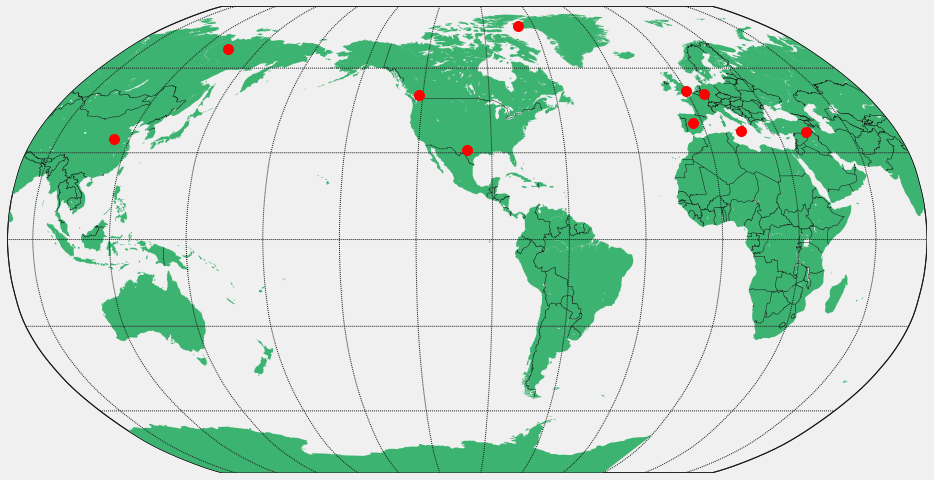

In [248]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='i', area_thresh=1000.0)

plt.rcParams["figure.figsize"] = (20,8)
 
#my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='mediumseagreen')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
lons = places.lon
lats = places.lat
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10, color='red')
 
#labels = places.location
#for label, xpt, ypt in zip(labels, x, y):
    #plt.text(xpt+300000, ypt-100000, label)    
    
plt.style.use('fivethirtyeight')
plt.show()

/var/folders/7c/h7nqhf2j7tg_4ltxxsxt0b6m0000gp/T/ipykernel_11098/3917111864.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  lytton.plot(x, y, 'bo', markersize=12, color='red')


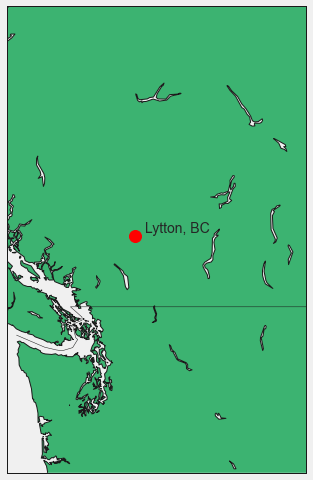

In [231]:
lytton = Basemap(projection='merc', lat_0 = 50, lon_0 = -121,
    resolution = 'i', area_thresh = 0.1,
    llcrnrlon=-125, llcrnrlat=46.0,
    urcrnrlon=-117, urcrnrlat=54)
 
lytton.drawcoastlines()
lytton.drawcountries()
lytton.fillcontinents(color = 'mediumseagreen')
lytton.drawmapboundary()
 
lon = -121.581404
lat = 50.233258
x,y = lytton(lon, lat)
lytton.plot(x, y, 'bo', markersize=12, color='red')
plt.text(x+30000, y+10000, 'Lytton, BC')

    
plt.style.use('fivethirtyeight')
plt.show()

In [91]:
all_df = pd.read_csv("databases/full_df_clean.csv")
lytton_df = pd.read_csv("databases/lytton.csv")

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn; seaborn.set()



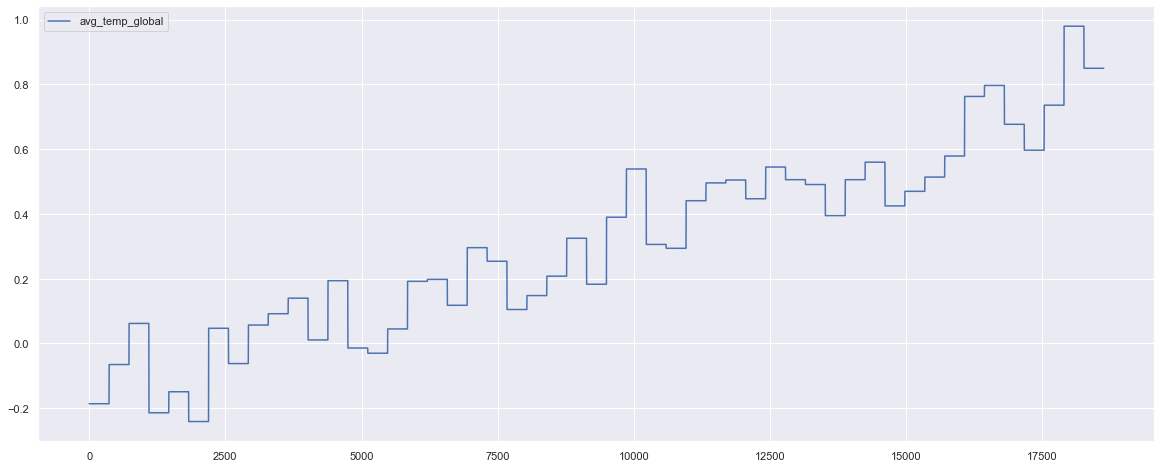

In [116]:
temp_data_all = all_df[['avg_temp_global']]
temp_data_all.plot();


In [276]:
all_df

,index,date,tempmax,tempmin,temp,humidity,precip,precipcover,snowdepth,windgust,...,sealevelpressure.14,year,avg_temp_global,mean_tempmax,mean_tempmin,mean_humidity,mean_precip,mean_snowdepth,mean_windspeed,mean_sealevelpressure
0,0,1971-01-01,17.9,8.9,14.6,54.7,0.0,0.00,0.0,0.0,...,1019.6,1971,-0.186,3.880000,-6.033333,71.160000,0.453333,11.346667,20.453333,1018.120000
1,1,1971-01-02,17.2,3.9,11.1,72.4,0.0,0.00,0.0,0.0,...,1017.9,1971,-0.186,4.980000,-5.400000,76.473333,0.453333,11.346667,21.026667,1018.226667
2,2,1971-01-03,17.9,8.9,14.6,53.9,0.0,0.00,0.0,0.0,...,1010.9,1971,-0.186,5.000000,-4.706667,74.326667,5.729333,11.346667,20.673333,1018.560000
3,3,1971-01-04,12.9,5.1,8.7,71.5,0.0,0.00,0.0,0.0,...,1010.9,1971,-0.186,3.513333,-5.720000,76.233333,0.916667,11.346667,14.973333,1019.893333
4,4,1971-01-05,12.9,5.1,9.2,81.4,0.0,0.00,0.0,0.0,...,1020.4,1971,-0.186,3.300000,-5.986667,75.873333,0.453333,11.346667,17.306667,1019.653333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18623,18623,2021-12-27,16.0,5.1,10.5,81.4,5.8,87.50,0.0,42.5,...,1015.5,2021,0.850,9.646667,1.780000,76.393333,8.659667,11.800000,17.973333,1016.326667
18624,18624,2021-12-28,13.0,6.0,9.6,93.5,22.4,95.83,0.0,13.0,...,1011.3,2021,0.850,10.566667,2.580000,74.293333,9.925667,11.866667,20.813333,1013.906667
18625,18625,2021-12-29,16.0,7.0,10.2,86.8,2.0,41.67,0.0,20.5,...,1011.6,2021,0.850,10.713333,2.726667,74.206667,6.539667,11.866667,20.573333,1015.806667
18626,18626,2021-12-30,14.0,9.0,11.4,71.5,1.5,25.00,0.0,33.5,...,1013.5,2021,0.850,11.106667,2.426667,73.493333,5.745667,11.866667,16.586667,1017.566667


In [277]:
all_df[all_df.columns.drop(list(all_df.filter(regex='precipcover')))]

,index,date,tempmax,tempmin,temp,humidity,precip,snowdepth,windgust,windspeed,...,sealevelpressure.14,year,avg_temp_global,mean_tempmax,mean_tempmin,mean_humidity,mean_precip,mean_snowdepth,mean_windspeed,mean_sealevelpressure
0,0,1971-01-01,17.9,8.9,14.6,54.7,0.0,0.0,0.0,46.4,...,1019.6,1971,-0.186,3.880000,-6.033333,71.160000,0.453333,11.346667,20.453333,1018.120000
1,1,1971-01-02,17.2,3.9,11.1,72.4,0.0,0.0,0.0,37.1,...,1017.9,1971,-0.186,4.980000,-5.400000,76.473333,0.453333,11.346667,21.026667,1018.226667
2,2,1971-01-03,17.9,8.9,14.6,53.9,0.0,0.0,0.0,37.1,...,1010.9,1971,-0.186,5.000000,-4.706667,74.326667,5.729333,11.346667,20.673333,1018.560000
3,3,1971-01-04,12.9,5.1,8.7,71.5,0.0,0.0,0.0,0.0,...,1010.9,1971,-0.186,3.513333,-5.720000,76.233333,0.916667,11.346667,14.973333,1019.893333
4,4,1971-01-05,12.9,5.1,9.2,81.4,0.0,0.0,0.0,0.0,...,1020.4,1971,-0.186,3.300000,-5.986667,75.873333,0.453333,11.346667,17.306667,1019.653333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18623,18623,2021-12-27,16.0,5.1,10.5,81.4,5.8,0.0,42.5,18.4,...,1015.5,2021,0.850,9.646667,1.780000,76.393333,8.659667,11.800000,17.973333,1016.326667
18624,18624,2021-12-28,13.0,6.0,9.6,93.5,22.4,0.0,13.0,11.2,...,1011.3,2021,0.850,10.566667,2.580000,74.293333,9.925667,11.866667,20.813333,1013.906667
18625,18625,2021-12-29,16.0,7.0,10.2,86.8,2.0,0.0,20.5,11.5,...,1011.6,2021,0.850,10.713333,2.726667,74.206667,6.539667,11.866667,20.573333,1015.806667
18626,18626,2021-12-30,14.0,9.0,11.4,71.5,1.5,0.0,33.5,22.3,...,1013.5,2021,0.850,11.106667,2.426667,73.493333,5.745667,11.866667,16.586667,1017.566667


In [278]:
# drop 2, 3, 4, 11, 14 - they were not 50 or 100 year records 
#import select as select
#all_df['mean_tempmax'] = select(all_df,contains("tempmax")).mean(axis=1)


all_df['mean_tempmax']= all_df.filter(regex = 'tempmax', axis=1).mean(axis=1)
all_df['mean_tempmin']= all_df.filter(regex = 'tempmin', axis=1).mean(axis=1)
all_df['mean_humidity']= all_df.filter(regex = 'humidity', axis=1).mean(axis=1)
all_df['mean_precip']= all_df.filter(regex = 'precip', axis=1).mean(axis=1)
all_df['mean_snowdepth']= all_df.filter(regex = 'snowdepth', axis=1).mean(axis=1)
all_df['mean_windspeed']= all_df.filter(regex = 'windspeed', axis=1).mean(axis=1)
all_df['mean_sealevelpressure']= all_df.filter(regex = 'sealevelpressure', axis=1).mean(axis=1)



In [279]:
mean_df = all_df[['year','mean_tempmax', 'mean_tempmin', 'mean_humidity', 'mean_precip', 'mean_snowdepth', 'mean_windspeed', 'mean_sealevelpressure', 'avg_temp_global']]

In [280]:
mean_df

,year,mean_tempmax,mean_tempmin,mean_humidity,mean_precip,mean_snowdepth,mean_windspeed,mean_sealevelpressure,avg_temp_global
0,1971,3.880000,-6.033333,71.160000,0.453333,11.346667,20.453333,1018.120000,-0.186
1,1971,4.980000,-5.400000,76.473333,0.453333,11.346667,21.026667,1018.226667,-0.186
2,1971,5.000000,-4.706667,74.326667,5.729333,11.346667,20.673333,1018.560000,-0.186
3,1971,3.513333,-5.720000,76.233333,0.916667,11.346667,14.973333,1019.893333,-0.186
4,1971,3.300000,-5.986667,75.873333,0.453333,11.346667,17.306667,1019.653333,-0.186
...,...,...,...,...,...,...,...,...,...
18623,2021,9.646667,1.780000,76.393333,8.659667,11.800000,17.973333,1016.326667,0.850
18624,2021,10.566667,2.580000,74.293333,9.925667,11.866667,20.813333,1013.906667,0.850
18625,2021,10.713333,2.726667,74.206667,6.539667,11.866667,20.573333,1015.806667,0.850
18626,2021,11.106667,2.426667,73.493333,5.745667,11.866667,16.586667,1017.566667,0.850


In [281]:
mean_df.drop(mean_df.tail(1).index,inplace=True)

/var/folders/7c/h7nqhf2j7tg_4ltxxsxt0b6m0000gp/T/ipykernel_11098/319447407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_df.drop(mean_df.tail(1).index,inplace=True)


In [282]:
import seaborn as sns
import pandas as pd
import numpy as np

 
# Min-Max Normalization
df = mean_df.drop('year', axis=1)
df_norm = (df-df.min())/(df.max()-df.min())
df_norm = pd.concat((df_norm, mean_df.year), 1)
 
print("Scaled Dataset Using Pandas")


Scaled Dataset Using Pandas


/var/folders/7c/h7nqhf2j7tg_4ltxxsxt0b6m0000gp/T/ipykernel_11098/503055321.py:9: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_norm = pd.concat((df_norm, mean_df.year), 1)


,mean_tempmax,mean_tempmin,mean_humidity,mean_precip,mean_snowdepth,mean_windspeed,mean_sealevelpressure,avg_temp_global,year
0,0.086553,0.007409,0.593021,0.008373,0.39845,0.230198,0.566934,0.045045,1971
1,0.121385,0.030115,0.757588,0.008373,0.39845,0.244072,0.571869,0.045045,1971
2,0.122018,0.054971,0.691101,0.210710,0.39845,0.235522,0.587292,0.045045,1971
3,0.074942,0.018642,0.750155,0.026142,0.39845,0.097596,0.648982,0.045045,1971
4,0.068187,0.009082,0.739005,0.008373,0.39845,0.154057,0.637878,0.045045,1971
...,...,...,...,...,...,...,...,...,...
65,0.162339,0.066922,0.533760,0.008373,0.39845,0.189547,0.671191,0.045045,1971
66,0.161072,0.063098,0.647945,0.008373,0.39845,0.219068,0.603640,0.045045,1971
67,0.201393,0.107792,0.733636,0.008373,0.39845,0.191482,0.607650,0.045045,1971
68,0.226515,0.115679,0.608507,0.040012,0.39845,0.220842,0.641271,0.045045,1971


In [283]:
df_norm.shape

(18627, 9)

In [284]:
df_norm = df_norm.groupby('year').mean()

In [164]:
df_norm

,mean_tempmax,mean_tempmin,mean_humidity,mean_precip,mean_snowdepth,mean_windspeed,mean_sealevelpressure,avg_temp_global
year,,,,,,,,
1971,0.369130,0.299730,0.690493,0.027346,0.398450,0.170371,0.551959,0.045045
1972,0.375114,0.334227,0.763131,0.014186,0.398450,0.145166,0.505310,0.144144
1973,0.529408,0.553162,0.484549,0.032992,0.397628,0.233545,0.378096,0.248157
1974,0.532714,0.549301,0.482455,0.042390,0.066262,0.234256,0.403497,0.022113
1975,0.531295,0.563338,0.501171,0.049102,0.128933,0.224581,0.412837,0.075348
1976,0.517714,0.544656,0.498909,0.044138,0.029292,0.222479,0.403965,0.000000
1977,0.533679,0.559864,0.477801,0.048410,0.027081,0.232392,0.412914,0.235872
1978,0.526236,0.552270,0.500875,0.054039,0.040980,0.224368,0.402025,0.146601
1979,0.524746,0.553293,0.472921,0.058923,0.029159,0.220596,0.410595,0.244062


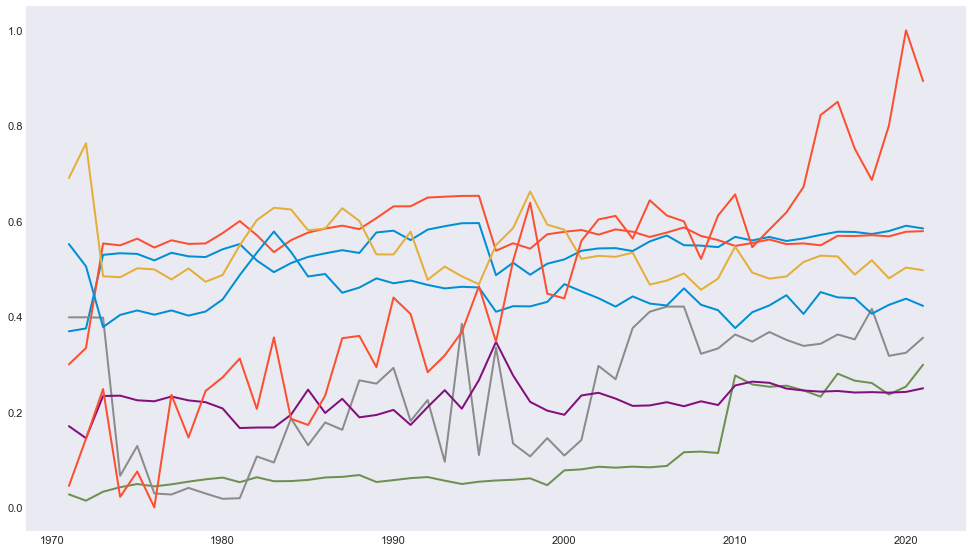

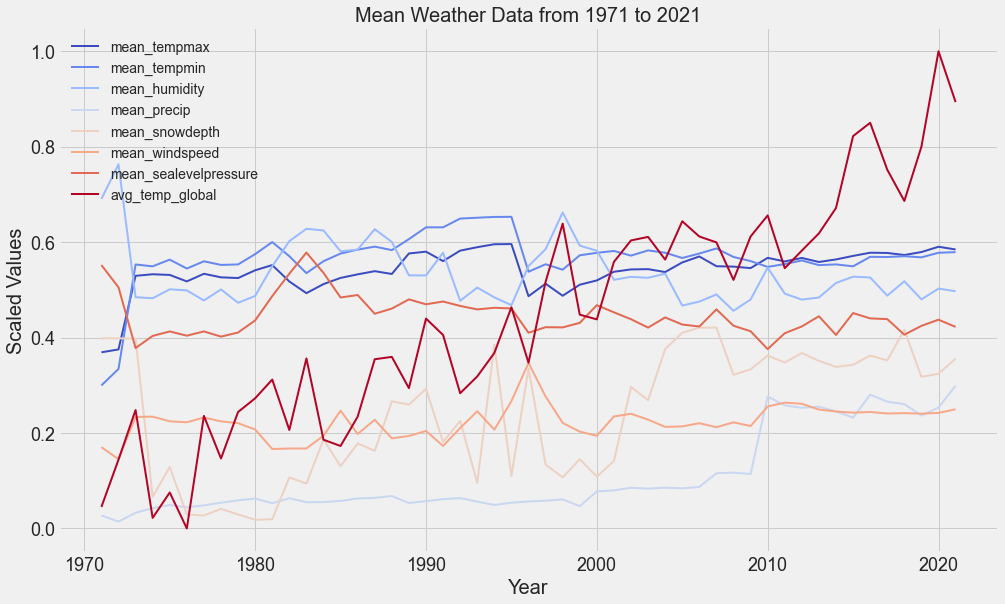

In [229]:
import matplotlib.pyplot as plt

# setting the graph size globally
plt.rcParams['figure.figsize'] = (15, 9)

# No need of this statement for each graph: plt.figure(figsize=[15, 9])

for col in df_norm.columns:
    plt.plot(df_norm[col], linewidth=2, label=col)
    #calculate equation for quadratic trendline
 

plt.style.use('fivethirtyeight')
df_norm.plot(colormap='coolwarm', linewidth=2, fontsize=18)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Scaled Values', fontsize=20)
plt.legend(fontsize=14, loc="upper left")
plt.title('Mean Weather Data from 1971 to 2021', loc='center', fontsize=20)
plt.show()



In [263]:
dates = pd.date_range("2021-06-26", periods=5, freq="D")

modeling = { 
            'ARIMA (univariate)': [36.72, 39.56,41.10,42.40,44.38],
            'Prophet (univariate)': [35.87,36.42,35.44,36.29,35.75],
           'Random Forest (multivariate)': [39.78,39.74,39.22,39.06,39.53],
           'Linear Regression (multivariate)': [42.44,44.30,45.57,47.91,40.47],
           'Auto ARIMA (multivariate)':[36.88, 38.32,38.82,39.09,39.18],
           'LSTM (multivariate)':[38.47,42.10,42.11,41.83,42.55], 
        'Ground Truth': [43, 45.1,46.2,48.1,42]}

results_df = pd.DataFrame(data=modeling, index=dates)

In [264]:
results_df

,ARIMA (univariate),Prophet (univariate),Random Forest (multivariate),Linear Regression (multivariate),Auto ARIMA (multivariate),LSTM (multivariate),Ground Truth
2021-06-26,36.72,35.87,39.78,42.44,36.88,38.47,43.0
2021-06-27,39.56,36.42,39.74,44.30,38.32,42.10,45.1
2021-06-28,41.10,35.44,39.22,45.57,38.82,42.11,46.2
2021-06-29,42.40,36.29,39.06,47.91,39.09,41.83,48.1
2021-06-30,44.38,35.75,39.53,40.47,39.18,42.55,42.0


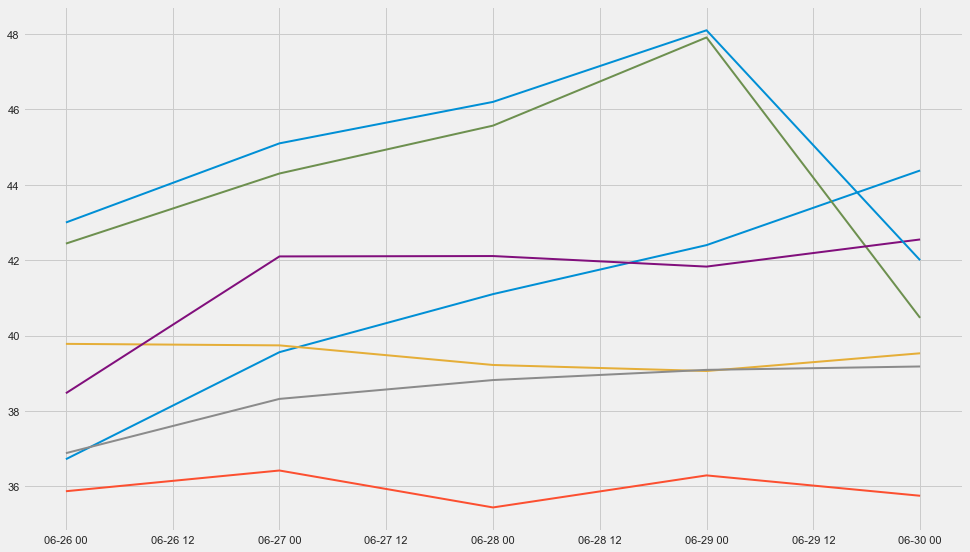

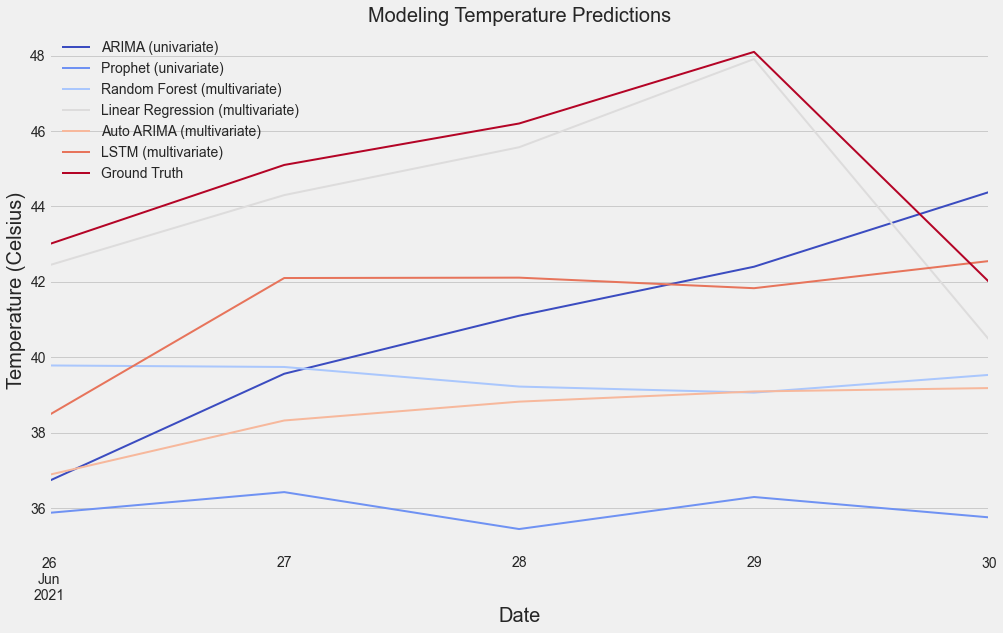

In [232]:
import matplotlib.pyplot as plt

# setting the graph size globally
plt.rcParams['figure.figsize'] = (15, 9)

# No need of this statement for each graph: plt.figure(figsize=[15, 9])

for col in results_df.columns:
    plt.plot(results_df[col], linewidth=2, label=col)
    #calculate equation for quadratic trendline
 

    
plt.style.use('fivethirtyeight')
results_df.plot(colormap='coolwarm', linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Temperature (Celsius)', fontsize=20)
plt.legend(fontsize=14, loc="upper left")
plt.title('Modeling Temperature Predictions', loc='center', fontsize=20)
plt.show()



In [253]:
actual = results_df[['Ground Truth']]

In [265]:
predicted = results_df.drop(columns=['Ground Truth'])

In [269]:
predicted = pd.DataFrame(predicted)